In [2]:
from tensorflow import keras

2025-08-02 12:20:06.215191: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-02 12:20:06.528532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754148006.664897   11645 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754148006.716967   11645 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754148006.970244   11645 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
modelo = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name='neuronio')])

/home/henrique/Desenvolvimento/repo/pessoal/FormacaoAluraKeras/curso1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1754148010.565143   11645 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ neuronio (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

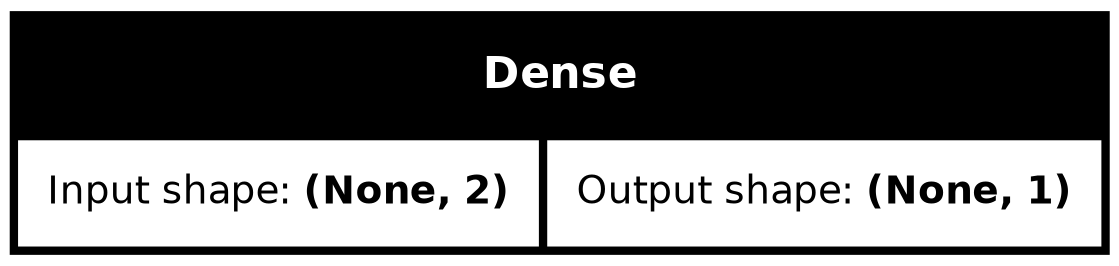

In [5]:
keras.utils.plot_model(modelo, show_shapes=True)

In [6]:
modelo.layers

[<Dense name=neuronio, built=True>]

In [7]:
pesos, bias = modelo.layers[0].get_weights()

In [8]:
print(pesos.shape)
print(pesos)

(2, 1)
[[-0.9874153 ]
 [ 0.43876314]]


In [9]:
print(bias.shape)
print(bias)

(1,)
[0.]


In [10]:
modelo = keras.Sequential(
    [
        keras.layers.Dense(
            units=1,
            input_shape=[2],
            name='neuronio',
            kernel_initializer=keras.initializers.RandomNormal(),
            bias_initializer=keras.initializers.Ones(),
        )
    ]
)

modelo.layers[0].get_weights()

/home/henrique/Desenvolvimento/repo/pessoal/FormacaoAluraKeras/curso1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[ 0.03960489],
        [-0.06184146]], dtype=float32),
 array([1.], dtype=float32)]

In [11]:
from sklearn import datasets

iris = datasets.load_iris(return_X_y=True)

x, y = iris

In [12]:
datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

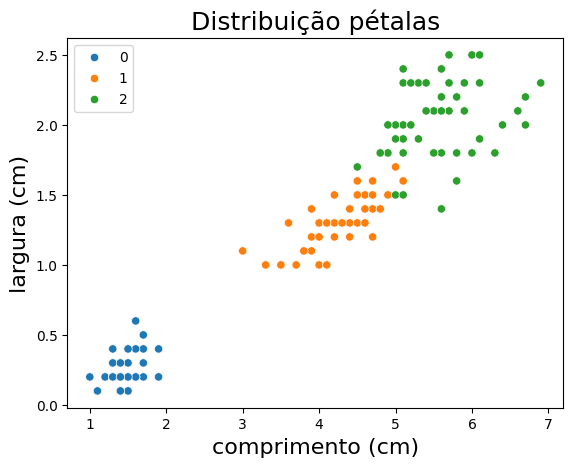

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,2],y=x[:,3],hue=y,palette='tab10')
plt.xlabel('comprimento (cm)', fontsize=16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição pétalas', fontsize=18)
plt.show()

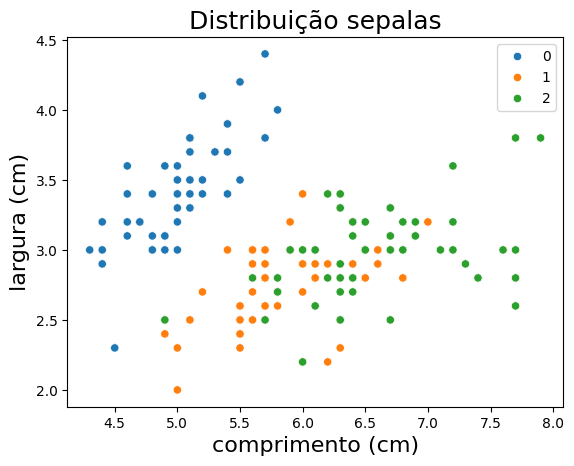

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,0],y=x[:,1],hue=y,palette='tab10')
plt.xlabel('comprimento (cm)', fontsize=16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição sepalas', fontsize=18)
plt.show()

In [17]:
y.shape

(150,)

In [18]:
y =keras.utils.to_categorical(y)

In [20]:
y.shape

(150, 3)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
x_treino.shape

(120, 4)

In [27]:
x_teste.shape

(30, 4)

In [29]:
modelo = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=[4], name='entrada'),
        keras.layers.Dense(
            512,
            activation='relu',
            name='oculta',
            kernel_initializer=keras.initializers.RandomNormal(seed=142),
        ),
        keras.layers.Dense(
            3,
            activation='softmax',
            name='saida',
        )
    ]
)

/home/henrique/Desenvolvimento/repo/pessoal/FormacaoAluraKeras/curso1/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [30]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ oculta (Dense)                  │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
modelo.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['categorical_accuracy'],
)

In [33]:
epocas=100

historio = modelo.fit(
    x_treino,
    y_treino,
    epochs=epocas,
    validation_split=0.3,
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3253 - loss: 1.0837 - val_categorical_accuracy: 0.6389 - val_loss: 1.0213
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.6479 - loss: 1.0150 - val_categorical_accuracy: 0.6389 - val_loss: 0.9776
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.6596 - loss: 0.9665 - val_categorical_accuracy: 0.6389 - val_loss: 0.9416
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.6440 - loss: 0.9369 - val_categorical_accuracy: 0.6389 - val_loss: 0.9106
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6752 - loss: 0.8859 - val_categorical_accuracy: 0.6389 - val_loss: 0.8812
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6596 - loss: 0.8613 - val_categorical_accuracy: 0.6389 - val_loss: 0.8535
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.6557 - loss: 0.8333 - va

In [34]:
historio.history

{'categorical_accuracy': [0.3928571343421936,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.7142857313156128,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.7023809552192688,
  0.6785714030265808,
  0.773809552192688,
  0.761904776096344,
  0.8214285969734192,
  0.773809552192688,
  0.8095238208770752,
  0.75,
  0.8452380895614624,
  0.8809523582458496,
  0.8095238208770752,
  0.8571428656578064,
  0.8690476417541504,
  0.8809523582458496,
  0.9166666865348816,
  0.8809523582458496,
  0.8809523582458496,
  0.9047619104385376,
  0.9404761791229248,
  0.9047619104385376,
  0.9047619104385376,
  0.9166666865348816,
  0.9166666865348816,
  0.9047619104385376,
  0.9166666865348816,
  0.9285714030265808,
  0.9166666865348816,
  0

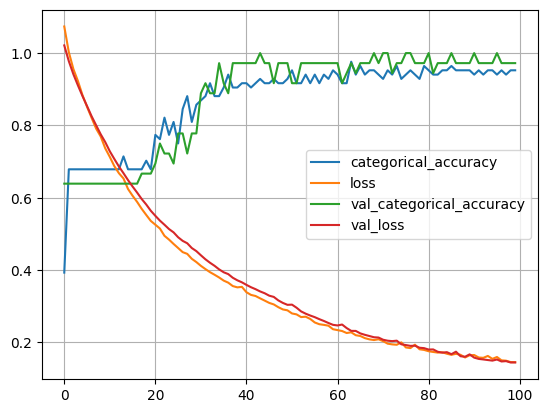

In [37]:
import pandas as pd

pd.DataFrame(historio.history).plot()
plt.grid()
plt.show()

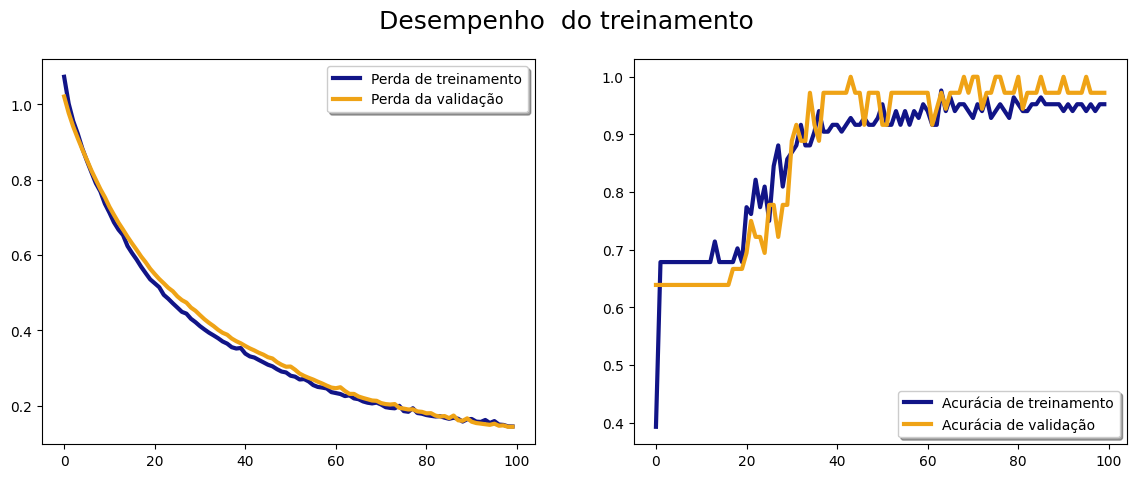

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(historio.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historio.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historio.history['categorical_accuracy'], color='#111487', linewidth=3, label='Acurácia de treinamento')
ax[1].plot(historio.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label='Acurácia de validação')
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho  do treinamento', fontsize=18)
plt.show()

In [48]:
modelo.evaluate(x_teste, y_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.9333 - loss: 0.1523


[0.15229733288288116, 0.9333333373069763]

In [54]:
modelo.predict(pd.DataFrame([[0.61, 0.5, 0.69, 0.79]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[6.6626482e-05, 2.7122217e-01, 7.2871113e-01]], dtype=float32)